In [2]:
import numpy as np
from numpy import genfromtxt

# Load data from the CSV file
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# Extract input (X) and output (y) data
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Function to normalize input data using mean normalization
def mean_normalization(X):
    N = len(X)
    max_val = np.max(X)
    min_val = np.min(X)
    mean_val = np.mean(X)
    
    # Apply mean normalization
    X_normalized = (X - mean_val) / (max_val - min_val)
    
    # Add bias term (column of ones)
    X_b = np.c_[np.ones((N, 1)), X_normalized]
    
    return X_b, max_val, min_val, mean_val

# Perform mean normalization on input data
X_b, max_val, min_val, mean_val = mean_normalization(X)

In [3]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []
    N = X_b.shape[0]  # Số lượng mẫu dữ liệu

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N)  # Bỏ comment dòng này trong ứng dụng thực tế
        shuffled_indices = np.asarray([
            21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170,
            27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96,
            22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110,
            53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138,
            20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130,
            127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195,
            72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
            92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38,
            47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157,
            46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95,
            0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142,
            65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156,
            2, 134, 56, 123, 122, 154
        ])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i: i + minibatch_size]
            yi = y_shuffled[i: i + minibatch_size]

            # Compute output
            yi_hat = xi.dot(thetas)

            # Compute loss
            loss = 1/2 * (yi_hat - yi)**2

            # Compute derivative of loss
            loss_grd = (yi_hat - yi)/ minibatch_size

            # Compute derivative of parameters
            gradients = xi.T.dot(loss_grd)

            # Update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

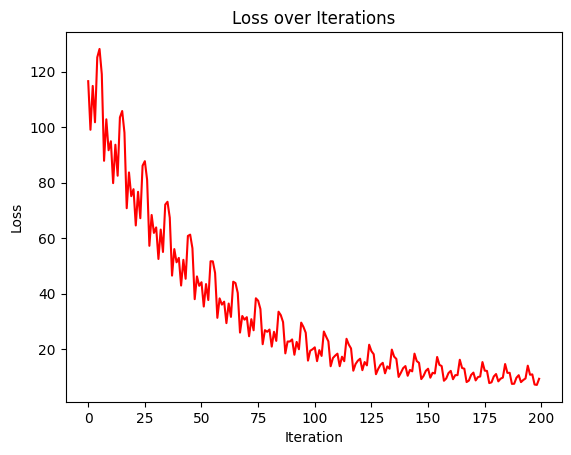

In [4]:
# Chạy thuật toán Mini-batch Gradient Descent
import matplotlib.pyplot as plt

mbgd_thetas, losses = mini_batch_gradient_descent(
    X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01
)

# Tạo trục x cho biểu đồ
x_axis = list(range(200))

# Vẽ biểu đồ hàm mất mát
plt.plot(x_axis, losses[:200], color="r")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()


In [5]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
print(round(sum(losses),2))

8865.65
